## Ohyb

Načtení nutných knihoven,

In [2]:
%matplotlib inline
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import Image


a inicializace sázeného výstupu,

In [3]:
sp.init_printing()

### Př1:

U rámu podle obrázku stanovte bezpečnost vzhledem k meznímu stavu pružnosti, jestliže jsou dány rozměry prutu $a$, $b$ a $c$, liniové zatížení $\boldsymbol{q}$, rozměry obdélníkového příčného průřezu $h$ a $s$, *Young*ův modul pružnosti $E$ a mez kluzu $\sigma_k$.

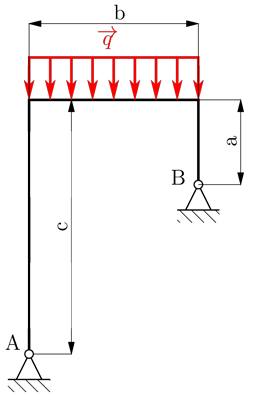

In [4]:
Image(filename='ohyb-ram2_a.png')

Úloha je $1\times$ staticky neurčitá.

*Úkol*: Proveďte úplné uvolnění a statický rozbor.

Částečné uvolnění lze provést několika způsoby, jedno z nich ukazuje následující obrázek,

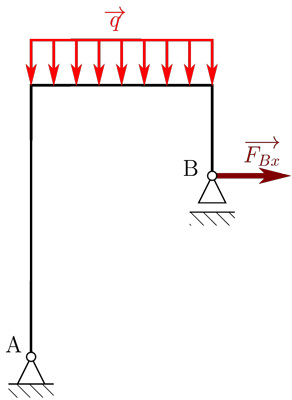

In [5]:
Image(filename='ohyb-ram2_b.png')

 s předepsanou deformační podmínkou,

\begin{equation}
  w_B=0\quad\Rightarrow\quad\frac{\partial W}{\partial F_{Bx}}=0.
\end{equation}

Nejdříve se zavedou potřebné symboly,

In [6]:
q,FAx,FAy,FBx,FBy=sp.symbols('q F_Ax F_Ay F_Bx F_By')
a,b,c,x1,x2,x3=sp.symbols('a b c x1 x2 x3')

Z úplného uvolnění plynou následující rovnice statické rovnováhy,

\begin{eqnarray}
  \sum M_A&:&F_{By}b-F_{Bx}(c-a)-\frac{qb^2}{2}=0, \\
  \sum M_B&:&F_{Ax}(c-a)-F_{Ay}b+\frac{qB^2}{2}=0, \\
  \sum F_x&:&F_{Ax}+F_{Bx}=0.
\end{eqnarray}

V *Sympy* se tato soustava zapíše následovně,

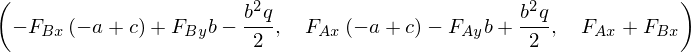

In [7]:
eqn1=FBy*b-FBx*(c-a)-q*b**2/2
eqn2=FAx*(c-a)-FAy*b+q*b**2/2
eqn3=FAx+FBx
eqn1,eqn2,eqn3

Jako parametr v částečném uvolnění byla zvolena reakce $F_{Bx}$, proto řešení pro jednotlivé reakce $F_{Ax}$, $F_{Ay}$ a $F_{By}$ musí záviset na $q$ a $F_{bx}$ a vypadají následovně,

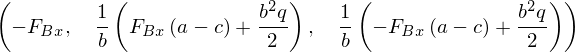

In [8]:
sol1=sp.linsolve([eqn1,eqn2,eqn3],[FAx,FAy,FBy])
FAx_solved,FAy_solved,FBy_solved=next(iter(sol1))
FAx_solved,FAy_solved,FBy_solved

Rám se rozdělí na tři úseky $x_1\in(0,a)$, $x_2\in(0,b)$ a $x_3\in(0,c)$. Výsledné vnitřní účinky v prvním a druhém úseku se vyšetřují proti směru hodinových ručiček od vazby $B$,

*Úsek I*:

\begin{eqnarray}
  &&N_1=-F_{By}, \\
  &&T_1=-F_{Bx}, \\
  &&M_1=F_{Bx}x_1
\end{eqnarray}

pro $x_1\in(0,a)$.

*Úsek II*:

\begin{eqnarray}
  &&N_2=F_{Bx}, \\
  &&T_2=-F_{By}+qx_2, \\
  &&M_2=F_{By}x_2+F_{Bx}a-\frac{qx_2}{2}
\end{eqnarray}

pro $x_2\in(0,b)$.

Výsledné vnitřní účinky na třetím úseku se vyšetří po směru hodinových ručiček od vazby $A$,

*Úsek III*:

\begin{eqnarray}
  &&N_3=-F_{Ay}, \\
  &&T_3=-F_{Ax}, \\
  &&M_3=-F_{Ax}x_3
\end{eqnarray}

pro $x_3\in(0,c)$.

Zapsáno v *Sympy*,

In [9]:
N1=-FBy
T1=-FBx
M1=FBx*x1
N2=FBx
T2=-FBy+q*x2
M2=-q*x2**2/2+FBy*x2+FBx*a
N3=-FAy
T3=-FAx
M3=-FAx*x3

In [10]:
N1,N2,N3

In [11]:
T1,T2,T3

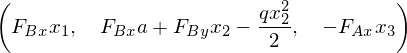

In [12]:
M1,M2,M3

Za $F_{Ax}$, $F_{Ay}$ a $F_{By}$ se musí dosadit do $N_1$, $N_2$ a $N_3$ a $T_1$, $T_2$ a $T_3$ výše vypočtené výrazy zavisející na $\boldsymbol{q}$ a $F_{Bx}$,

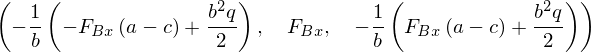

In [13]:
N1=N1.subs(FBy,FBy_solved)
N3=N3.subs(FAy,FAy_solved)
N1,N2,N3

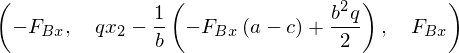

In [14]:
T2=T2.subs(FBy,FBy_solved)
T3=T3.subs(FAx,FAx_solved)
T1,T2,T3

Totéž samozřejmě platí i pro $M_1$, $M_2$ a $M_3$,

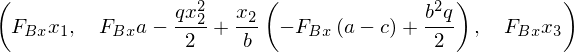

In [15]:
M2=M2.subs(FBy,FBy_solved)
M3=M3.subs(FAx,FAx_solved)
M1,M2,M3

Při splnění prutových předpokladů, tj. že $a,b,c\gg h$ se v deformační energii $W$ uvažují pouze příspěvky od vnitřních momentů $M_1$, $M_2$ a $M_3$. Proto je v deformační podmínce nutné znát derivace vnitřních účinku $M_1$, $M_2$ a $M_3$ podle $F_{Bx}$,

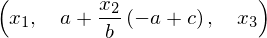

In [16]:
dM1=M1.diff(FBx)
dM2=M2.diff(FBx)
dM3=M3.diff(FBx)
dM1,dM2,dM3

Deformační podmínka má po rozepsání na jednotlivé integrály tvar

\begin{equation}
  \int_0^aM_1\frac{\partial M_1}{\partial F_{Bx}}\mathrm{d}x_1+
  \int_0^bM_2\frac{\partial M_2}{\partial F_{Bx}}\mathrm{d}x_2+
  \int_0^cM_3\frac{\partial M_3}{\partial F_{Bx}}\mathrm{d}x_3=0
\end{equation}

a po integraci se dostane rovnice o jedné neznámé $F_{Bx}$,

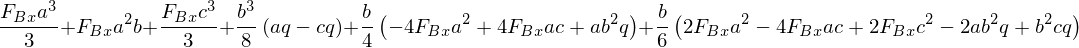

In [17]:
eqn4=sp.integrate(M1*dM1,[x1,0,a])+sp.integrate(M2*dM2,[x2,0,b]) \
     +sp.integrate(M3*dM3,[x3,0,c])
eqn4

Po drobné upravě,

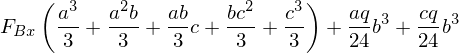

In [18]:
eqn4.expand().collect(FBx)

se dostane řešení pro $F_{Bx}$ ve tvaru,

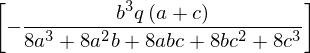

In [19]:
sol2=sp.solve(eqn4,FBx)
sol2

Nyní se musí vypočtené $F_{Bx}$ zpětně dosadit do reakcí $F_{Ax}$, $F_{Ay}$ a $F_{By}$ a ty do vnitřních účinků,

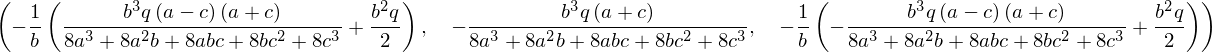

In [20]:
N1_solved=N1.subs(FBx,sol2[0])
N2_solved=N2.subs(FBx,sol2[0])
N3_solved=N3.subs(FBx,sol2[0])
N1_solved,N2_solved,N3_solved

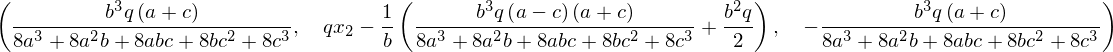

In [21]:
T1_solved=T1.subs(FBx,sol2[0])
T2_solved=T2.subs(FBx,sol2[0])
T3_solved=T3.subs(FBx,sol2[0])
T1_solved,T2_solved,T3_solved

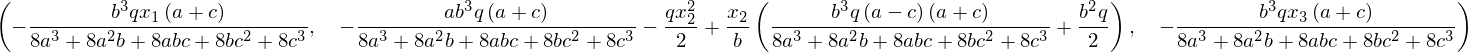

In [22]:
M1_solved=M1.subs(FBx,sol2[0])
M2_solved=M2.subs(FBx,sol2[0])
M3_solved=M3.subs(FBx,sol2[0])
M1_solved,M2_solved,M3_solved

Další výpočty se pro jednoduchost provedou numericky. Nechť má rám následující parametry,

\begin{eqnarray}
  &&a=1\,\mathrm{m},\\
  &&b=2\,\mathrm{m},\\
  &&c=3\,\mathrm{m},\\
  &&h=50\,\mathrm{mm},\\
  &&s=20\,\mathrm{mm},\\
  &&q=10\,\mathrm{N\times mm^{-1}}.
\end{eqnarray}

V *Pythonu* se to může zapsat následovně,

In [23]:
a_,b_,c_,h_,s_=1000.,2000.,3000.,50.,20.
q_=10

Pak pro reakce ve vazbách $F_{Ax}$, $F_{Ay}$, $F_{Bx}$ a $F_{By}$ platí,

In [24]:
FAx_=FAx_solved.subs({FBx:sol2[0],a:a_,b:b_,c:c_,q:q_})
FAy_=FAy_solved.subs({FBx:sol2[0],a:a_,b:b_,c:c_,q:q_})
FBx_=sol2[0].subs({a:a_,b:b_,c:c_,q:q_})
FBy_=FBy_solved.subs({FBx:sol2[0],a:a_,b:b_,c:c_,q:q_})
FAx_,FAy_,FBx_,FBy_

a pro vnitřní účinky $N_1$, $N_2$ a $N_3$ platí,

In [25]:
N1_=N1_solved.subs({a:a_,b:b_,c:c_,q:q_})
N2_=N2_solved.subs({a:a_,b:b_,c:c_,q:q_})
N3_=N3_solved.subs({a:a_,b:b_,c:c_,q:q_})
N1_,N2_,N3_

pro vnitřní účinky $T_1$, $T_2$ a $T_3$ platí,

In [26]:
T1_=T1_solved.subs({a:a_,b:b_,c:c_,q:q_})
T2_=T2_solved.subs({a:a_,b:b_,c:c_,q:q_})
T3_=T3_solved.subs({a:a_,b:b_,c:c_,q:q_})
T1_,T2_,T3_

a nakonec pro $M_1$, $M_2$ a $M_3$ platí,

In [27]:
M1_=M1_solved.subs({a:a_,b:b_,c:c_,q:q_})
M2_=M2_solved.subs({a:a_,b:b_,c:c_,q:q_})
M3_=M3_solved.subs({a:a_,b:b_,c:c_,q:q_})
M1_,M2_,M3_

#### Vykreslení výsledných vnitřních účinků

Vyjádření výsledných vnitřních účinků v rovnoměrně podél střednice

In [28]:
x1_=np.linspace(0,a_,20)
N1_plot=[float(N1_) for ii in x1_]
T1_plot=[float(T1_) for ii in x1_]
M1_plot=[float(M1_.subs(x1,ii)) for ii in x1_]
x2_=np.linspace(0,b_,20)
N2_plot=[float(N2_) for ii in x2_]
T2_plot=[float(T2_.subs(x2,ii)) for ii in x2_]
M2_plot=[float(M2_.subs(x2,ii)) for ii in x2_]
x3_=np.linspace(0,c_,20)
N3_plot=[float(N3_) for ii in x3_]
T3_plot=[float(T3_) for ii in x3_]
M3_plot=[float(M3_.subs(x3,ii)) for ii in x3_]

Vykreslení normálových vnitřních účinků $N(x)$,

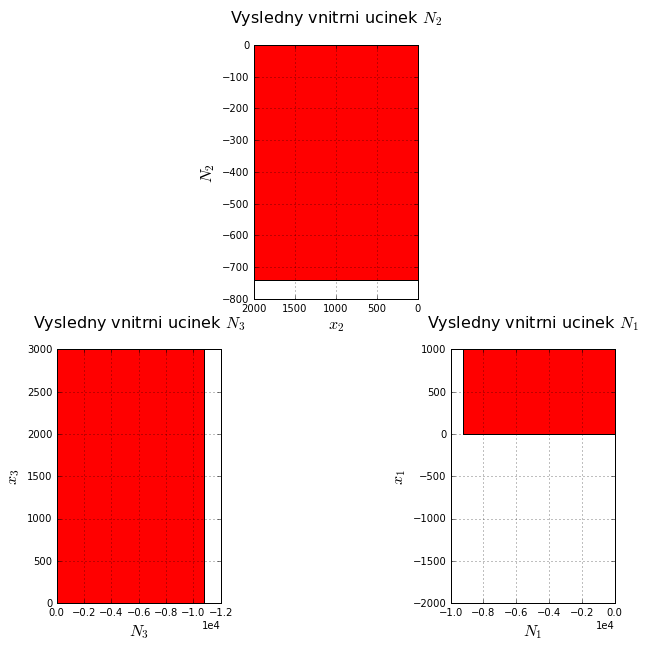

In [29]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2,3,figsize=(10,10))
ax1.axis('off')
ax3.axis('off')
ax5.axis('off')

ax2.fill_between(x2_,0,N2_plot,facecolor='red')
ax4.fill_betweenx(x3_,0,N3_plot,facecolor='red')
ax6.fill_betweenx(x1_,0,N1_plot,facecolor='red')
ax2.invert_xaxis()
ax4.invert_xaxis()
ax2.grid(True)
ax4.grid(True)
ax6.grid(True)
ax6.set_ylim(-2000,1000)
ax2.set_xlabel(r'$x_2$').set_fontsize(16)
ax2.set_ylabel(r'$N_2$').set_fontsize(16)
ax4.set_ylabel(r'$x_3$').set_fontsize(16)
ax4.set_xlabel(r'$N_3$').set_fontsize(16)
ax4.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax6.set_ylabel(r'$x_1$').set_fontsize(16)
ax6.set_xlabel(r'$N_1$').set_fontsize(16)
ax6.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax2.set_title('Vysledny vnitrni ucinek '+r'$N_2$'+'\n').set_fontsize(16)
ax4.set_title('Vysledny vnitrni ucinek '+r'$N_3$'+'\n').set_fontsize(16)
ax6.set_title('Vysledny vnitrni ucinek '+r'$N_1$'+'\n').set_fontsize(16)

Vykreslení smykových vnitřních účinků $T(x)$,

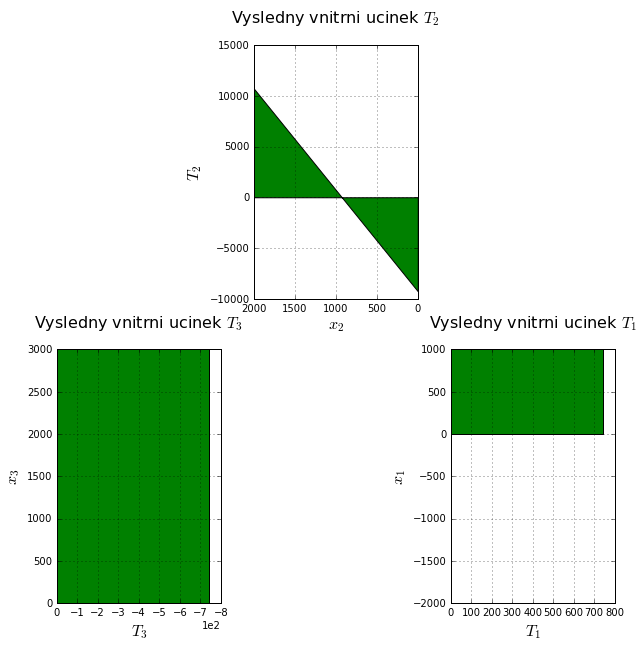

In [35]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2,3,figsize=(10,10))
ax1.axis('off')
ax3.axis('off')
ax5.axis('off')

ax2.fill_between(x2_,0,T2_plot,facecolor='green')
ax4.fill_betweenx(x3_,0,T3_plot,facecolor='green')
ax6.fill_betweenx(x1_,0,T1_plot,facecolor='green')
ax2.invert_xaxis()
ax4.invert_xaxis()
ax2.grid(True)
ax4.grid(True)
ax6.grid(True)
ax6.set_ylim(-2000,1000)
ax2.set_xlabel(r'$x_2$').set_fontsize(16)
ax2.set_ylabel(r'$T_2$').set_fontsize(16)
ax4.set_ylabel(r'$x_3$').set_fontsize(16)
ax4.set_xlabel(r'$T_3$').set_fontsize(16)
ax4.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax6.set_ylabel(r'$x_1$').set_fontsize(16)
ax6.set_xlabel(r'$T_1$').set_fontsize(16)
ax2.set_title('Vysledny vnitrni ucinek '+r'$T_2$'+'\n').set_fontsize(16)
ax4.set_title('Vysledny vnitrni ucinek '+r'$T_3$'+'\n').set_fontsize(16)
ax6.set_title('Vysledny vnitrni ucinek '+r'$T_1$'+'\n').set_fontsize(16)

Vykreslení momentových vnitřních účinků $M(x)$,

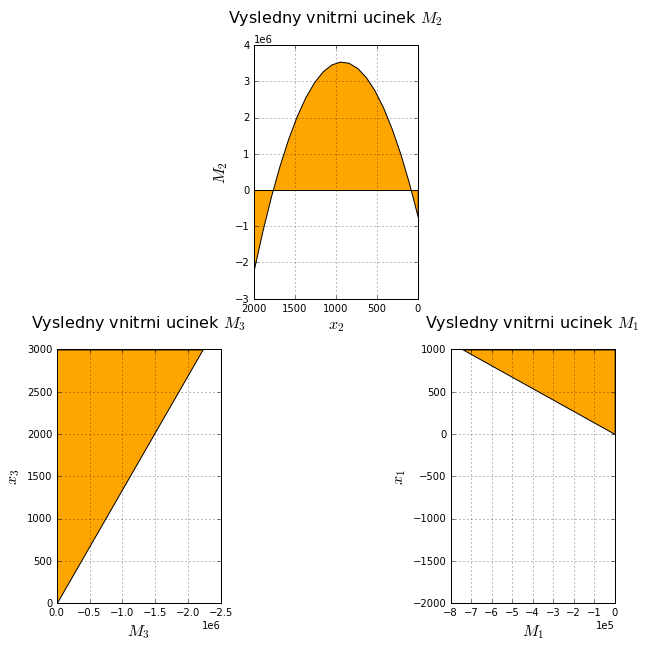

In [37]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6))=plt.subplots(2,3,figsize=(10,10))
ax1.axis('off')
ax3.axis('off')
ax5.axis('off')

ax2.fill_between(x2_,0,M2_plot,facecolor='orange')
ax4.fill_betweenx(x3_,0,M3_plot,facecolor='orange')
ax6.fill_betweenx(x1_,0,M1_plot,facecolor='orange')
ax2.invert_xaxis()
ax4.invert_xaxis()
ax2.grid(True)
ax4.grid(True)
ax6.grid(True)
ax6.set_ylim(-2000,1000)
ax2.set_xlabel(r'$x_2$').set_fontsize(16)
ax2.set_ylabel(r'$M_2$').set_fontsize(16)
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax4.set_ylabel(r'$x_3$').set_fontsize(16)
ax4.set_xlabel(r'$M_3$').set_fontsize(16)
ax4.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax6.set_ylabel(r'$x_1$').set_fontsize(16)
ax6.set_xlabel(r'$M_1$').set_fontsize(16)
ax6.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax2.set_title('Vysledny vnitrni ucinek '+r'$M_2$'+'\n').set_fontsize(16)
ax4.set_title('Vysledny vnitrni ucinek '+r'$M_3$'+'\n').set_fontsize(16)
ax6.set_title('Vysledny vnitrni ucinek '+r'$M_1$'+'\n').set_fontsize(16)

Extrémní napětí vyjádříme pouze z momentových vnitřních účinků $M(x)$. Z výše uvedých grafů je zřejmé, že globální extrémní hodnotu nabývá moment $M_2(x_{max})$ v bodě $x_{max}$, který se nalezne jako řešení ronice,

$$
  \frac{\mathrm{d}}{\mathrm{d}x}M_2(x)=T_2(x)=0,
$$

která má řešení,

In [32]:
sol3=sp.solve(T2_,x2)
x2_max=float(sol3[0])
x2_max

Hodnota vnitřního momentu $M_2$ v tomto bodě je (jenotky jsou $\mathrm{N}\times\mathrm{mm}$),

In [33]:
M2_max=abs(float(M2_.subs(x2,x2_max)))
M2_max

Odpovídající *tahové napětí* se spočítá podle vztahu

$$
  \sigma_x=\frac{M_2\left( x_{max}\right)}{W_o},
$$

kde 

$$
  W_o=\frac{1}{6}sh^2
$$

je *modul pružnosti v ohybu*,

In [34]:
Wo=1./6.*s_*h_**2
sigma_max=M2_max/Wo
print 'Maximální moment je {0:11.5e} Nmm,\nmaximalní tahové napětí je {1:11.5e} MPa.'.format(M2_max,sigma_max)

Maximální moment je 3.54595e+06 Nmm,
maximalní tahové napětí je 4.25514e+02 MPa.


*Úkol*: Stanovte bezbečnosti vzhledem k *meznímu stavu pružnosti*, jestliže $\sigma_k=600\ \mathrm{MPa}$.